In [65]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
DIR = '/Users/seop/Documents/GitHub/Prediction-of-IPO-stock-price-using-chatbot/'

df = pd.read_csv(DIR+'/data/refined_data.csv')
df.drop('Unnamed: 0',axis = 1,inplace = True)
df


,기업명,매출액(백만원),순이익(백만원),구주매출,희망공모가(최저),희망공모가(최고),청약경쟁률(:1),확정공모가(원),경쟁률(:1),의무보유확약(:1),시초/공모%(수익률),공모가(원),시초가(원),상장일
0,에이치피에스피,61174.0,17658.0,1.00,23000.0,25000.0,1159.05,25000,1511.36,42.54,100.00,25000,50000,20220715
1,영창케미칼,60760.0,2506.0,0.83,15000.0,18600.0,682.13,18600,1616.27,5.92,-1.08,18600,18400,20220714
2,넥스트칩,10383.0,-13496.0,1.00,9900.0,11600.0,1727.38,13000,1623.41,11.58,31.92,13000,17150,20220701
3,위니아에이드,418527.0,24895.0,1.00,14200.0,16200.0,111.26,16200,955.00,1.39,-9.88,16200,14600,20220623
4,레이저쎌,3879.0,-7665.0,1.00,12000.0,14000.0,1845.11,16000,1442.95,12.43,28.75,16000,20600,20220624
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
547,아비스타,NaN,NaN,1.00,10000.0,12000.0,389.19,11100,NaN,99.95,18.92,11100,13200,20061226
548,주연테크,312220.0,6035.0,1.00,6000.0,8000.0,533.25,6400,NaN,99.96,59.38,6400,10200,20061115
549,인천도시가스,NaN,NaN,1.00,18000.0,22000.0,557.93,19000,NaN,99.98,78.95,19000,34000,20061107
550,삼정펄프,NaN,NaN,1.00,28000.0,32000.0,610.31,29000,NaN,99.94,91.03,29000,55400,20061017


In [68]:
df = df.dropna(axis = 0)
df

,기업명,매출액(백만원),순이익(백만원),구주매출,희망공모가(최저),희망공모가(최고),청약경쟁률(:1),확정공모가(원),경쟁률(:1),의무보유확약(:1),시초/공모%(수익률),공모가(원),시초가(원),상장일
0,에이치피에스피,61174.0,17658.0,1.00,23000.0,25000.0,1159.05,25000,1511.36,42.54,100.00,25000,50000,20220715
1,영창케미칼,60760.0,2506.0,0.83,15000.0,18600.0,682.13,18600,1616.27,5.92,-1.08,18600,18400,20220714
2,넥스트칩,10383.0,-13496.0,1.00,9900.0,11600.0,1727.38,13000,1623.41,11.58,31.92,13000,17150,20220701
3,위니아에이드,418527.0,24895.0,1.00,14200.0,16200.0,111.26,16200,955.00,1.39,-9.88,16200,14600,20220623
4,레이저쎌,3879.0,-7665.0,1.00,12000.0,14000.0,1845.11,16000,1442.95,12.43,28.75,16000,20600,20220624
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466,세화아이엠씨,220665.0,4108.0,1.00,14500.0,16300.0,731.79,16300,216.35,10.45,11.04,16300,18100,20150319
467,제일모직,3018454.0,96302.0,1.00,45000.0,53000.0,194.90,53000,465.00,35.14,100.00,53000,106000,20141218
468,씨에스윈드,296488.0,26861.0,1.00,31000.0,43500.0,66.40,43500,109.30,1.79,-10.00,43500,39150,20141127
469,삼성SDS,7046833.0,325983.0,1.00,150000.0,190000.0,134.19,190000,651.50,48.11,100.00,190000,380000,20141114


In [67]:
df.isnull().sum()
df.to_csv('')

기업명            0
매출액(백만원)       0
순이익(백만원)       0
구주매출           0
희망공모가(최저)      0
희망공모가(최고)      0
청약경쟁률(:1)      0
확정공모가(원)       0
경쟁률(:1)        0
의무보유확약(:1)     0
시초/공모%(수익률)    0
공모가(원)         0
시초가(원)         0
상장일            0
dtype: int64

In [8]:
from sklearn.model_selection import train_test_split
x= df[["매출액(백만원)","순이익(백만원)","구주매출","희망공모가(최저)","희망공모가(최고)","청약경쟁률(:1)","확정공모가(원)","경쟁률(:1)","의무보유확약(:1)","공모가(원)","시초가(원)"]]
y= df["시초/공모%(수익률)"]

In [9]:
x_train, x_test,y_train,y_test = train_test_split(x, y, train_size=0.8,test_size=0.2)
#8:2의 비율로 training, test set 분리
print(x_train.shape)
print(x_test.shape)


(368, 11)
(92, 11)


In [59]:
from sklearn.linear_model import Lasso,Ridge
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb

Model = xgb.XGBRegressor(learning_rate=0.1,max_depth=5,n_estimators=150)
lasso = Model.fit(x_train, y_train)
prd = lasso
prd.fit(x_train,y_train)

/Users/seop/miniforge3/envs/jiseopy/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.1, max_delta_step=0,
             max_depth=5, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=150, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [60]:
y_predict = lasso.predict(x_test)

In [61]:
import matplotlib.pyplot as plt
plt.rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

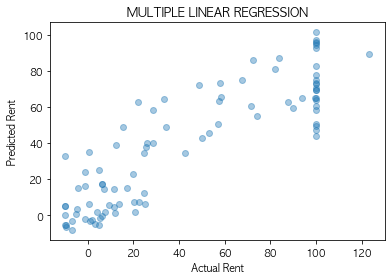

In [62]:
plt.scatter(y_test, y_predict, alpha = 0.4)
plt.xlabel("Actual Rent")
plt.ylabel("Predicted Rent")
plt.title("MULTIPLE LINEAR REGRESSION")
plt.show()

In [63]:
from sklearn.metrics import mean_absolute_error
mae_test=mean_absolute_error(y_test,y_predict)
#수치가 낮을수록 정확도가 높음
from sklearn.metrics import mean_squared_error
mse_test=mean_squared_error(y_test, y_predict)
#수치가 낮을수록 정확도가 높음
from sklearn.metrics import r2_score
r2_score=r2_score(y_test, y_predict)

In [64]:
print('lasso regression: Mean squared error: %f' %(mse_test)) 
print('lasso regression: Mean_absolute_error: %f' %(mae_test)) 
print('lasso regression: r2_score: %f' %(r2_score)) 

lasso regression: Mean squared error: 466.781697
lasso regression: Mean_absolute_error: 16.791168
lasso regression: r2_score: 0.741100
